<span>
<b>Author:</b> Chenxiang Zhang <br/>
<b>Python version:</b>  3.x <br/>
</span>

## Frequent Patterns & Association Rules Mining
In our dataset we have multiple vendors. As in real world, each vendor sale distribution does not influence and thus is independent from the others. In order to conduct the analysis, we pick four different vendors and analyze their most frequent and interesting patterns. The chosen vendors are two big-sellers and two small-sellers.

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fim import apriori

plt.style.use('ggplot')

In [3]:
df = pd.read_csv('../../data/sales_ram_cleaned.csv', sep=',')
df.drop(columns=['Unnamed: 0', 'sales_usd', 'region', 'brand',
                   'memory', 'memory_type', 'clock', 'day', 'week'], inplace=True)
df.head()

,ram_code,time_code,geo_code,vendor_code,continent,country,name,year,month,vendor_name
0,8,20170120,69,52,America,United States of America,Adata,2017,1,Newegg Marketplace
1,8,20170202,70,52,America,United States of America,Adata,2017,2,Newegg Marketplace
2,8,20170210,72,52,America,United States of America,Adata,2017,2,Newegg Marketplace
3,8,20170211,73,52,America,United States of America,Adata,2017,2,Newegg Marketplace
4,8,20170212,74,52,America,United States of America,Adata,2017,2,Newegg Marketplace


### Frequent Patterns
In our data we don't have a feature that can be used to create a grouping all the products bought in a transaction. The assumption that we use is to consider all the purchases in a day as a single transaction with multiple products. Furthermore, we run the Apriori algorithm for each of the top 3 vendors. Big vendors are more interesting since they sell more items. 

In [4]:
df_fp = df[['vendor_name', 'time_code', 'name']]
vendor_n_transactions = df_fp.groupby(['vendor_name'])['name'].count()
vendor_n_transactions = vendor_n_transactions.sort_values(ascending=False)
vendor_n_transactions

vendor_name
Mindfactory        250504
Newegg             121439
More Computers      79525
Newegg Canada       57074
Ebuyer              56669
                    ...  
Storm Computers        76
Senetic                68
Playtech               53
YoYoTech               34
Monoprice               7
Name: name, Length: 76, dtype: int64

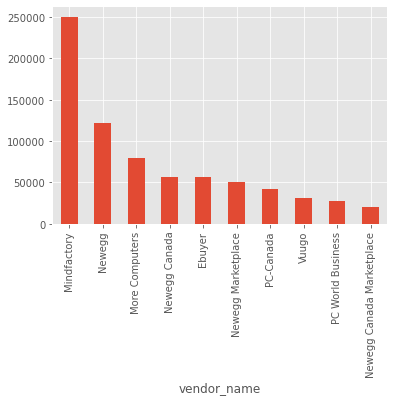

In [5]:
top_vendors_n_transactions = vendor_n_transactions[:10]
top_vendors_n_transactions.plot(kind='bar')
top_vendors = top_vendors_n_transactions.index

In [6]:
# change the i to print and inspect the itemsets of the vendor i
i = 7
vendor = df_fp[df_fp['vendor_name']==top_vendors[i]]
transactions = vendor.groupby(['time_code'])['name'].apply(list)

# compute Apriori
# Apriori report 'S' = support as percentage
baskets = transactions.values
itemsets = apriori(baskets, supp=80, zmin=2, zmax=5, target='a', report='S')
itemsets

[(('Kingston Hyperx Savage', 'Kingston'), 83.86123680241327),
 (('Kingston Hyperx Savage', 'Kingston', 'Kingston Hyperx Fury'),
  83.40874811463047),
 (('Kingston Hyperx Savage', 'Kingston Hyperx Fury'), 83.55957767722474),
 (('Crucial', 'Kingston'), 83.2579185520362),
 (('Crucial', 'Kingston', 'Kingston Hyperx Fury'), 82.50377073906485),
 (('Crucial', 'Kingston Hyperx Fury'), 85.67119155354449),
 (('Kingston', 'Kingston Hyperx Fury'), 90.04524886877829)]

Frequent itemsets for Mindfactory, total sale ~250000, supp 95%+: this vendor sells an incredible high quantity of products every day. This explains why for most of the products has a high support.
- (('Corsair Vengeance', 'G.Skill Trident Z'), 100.0)
- (('G.Skill', 'Corsair Vengeance', 'G.Skill Trident Z', 'G.Skill Ripjaws V', 'Kingston Valueram'), 99.01269393511988)

Frequent itemsets for Vuugo, total sale ~30000, supp 80-90%:
- (('Kingston', 'Kingston Hyperx Fury'), 90.04524886877829)
- (('Crucial', 'Kingston Hyperx Fury'), 85.67119155354449)

Most of the remaining itemsets are derived from these reported sets. All the previous results are expected, since these big vendors has a large variety of products and also sell in an enourmous high quantity every day. We proceed to analyze few smaller vendors too.

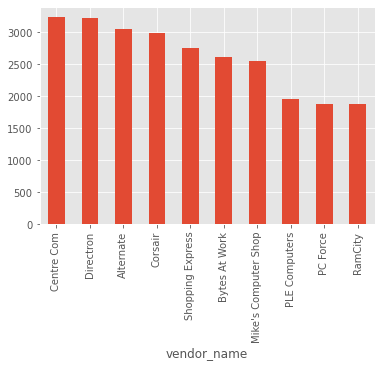

In [7]:
top_vendors_n_transactions = vendor_n_transactions[40:50]
top_vendors_n_transactions.plot(kind='bar')
top_vendors = top_vendors_n_transactions.index

In [8]:
# change the i to print and inspect the itemsets of the vendor i
i = 8
vendor = df_fp[df_fp['vendor_name']==top_vendors[i]]
transactions = vendor.groupby(['time_code'])['name'].apply(list)

# compute Apriori
# Apriori report 'S' = support as percentage
baskets = transactions.values
itemsets = apriori(baskets, supp=40, zmin=2, zmax=5, target='a', report='S')
itemsets

[(('Kingston Valueram', 'Kingston Hyperx Fury'), 42.51207729468599),
 (('Kingston Valueram', 'Kingston Hyperx Fury', 'Corsair Vengeance'),
  41.06280193236715),
 (('Kingston Valueram', 'G.Skill Ripjaws V'), 41.54589371980676),
 (('Kingston Valueram', 'G.Skill Ripjaws V', 'Corsair Vengeance'),
  40.57971014492754),
 (('Kingston Valueram', 'Corsair Vengeance'), 43.47826086956522),
 (('Kingston Hyperx Fury', 'G.Skill Ripjaws V'), 45.893719806763286),
 (('Kingston Hyperx Fury', 'G.Skill Ripjaws V', 'Corsair Vengeance'),
  41.54589371980676),
 (('Kingston Hyperx Fury', 'Corsair Vengeance'), 44.927536231884055),
 (('G.Skill Ripjaws V', 'Corsair Vengeance'), 53.14009661835749)]

Frequent itemsets for Centre Com, total sale ~3000, supp 30%:
- (('Kingston Hyperx Fury', 'Corsair Vengeance'), 43.21608040201005)
- (('Crucial', 'Corsair Vengeance'), 30.15075376884422)

Frequent itemsets for PC Force, total sale ~2000, supp 40%:
- (('G.Skill Ripjaws V', 'Corsair Vengeance'), 53.14009661835749)
- (('Kingston Valueram', 'Kingston Hyperx Fury'), 42.51207729468599),

The support computed from those small vendors are lower with respect to the big vendors. We see that the itemsets for the first vendor are derived from the single itemset {Corsair Vengenance}.

### Association Rules
In this task, the goal is to find all the rules satisfying a minimal support and a minimal confidence. An association rule is implication expression of the form X -> Y, where X and Y are disjoint itemsets. Support indicates the fraction of transaction containing both X and Y. While, confidence is how often items in Y appear in transactions containing X. In order to mine the association rules, we are once again using the Apriori algorithm. 

In [9]:
top_vendors_n_transactions = vendor_n_transactions[:10]
top_vendors = top_vendors_n_transactions.index

In [11]:
# change the i to print and inspect the itemsets of the vendor i
i = 0
vendor = df_fp[df_fp['vendor_name']==top_vendors[i]]
transactions = vendor.groupby(['time_code'])['name'].apply(list)

# extract interesting association rules
# Apriori report 'S' = support as percentage
#                'C' = confidence as percentage
baskets = transactions.values
rules = apriori(baskets, supp=99, zmin=2, zmax=3, target='r', conf=99, report='SC') 
rules

[('Kingston Hyperx Predator',
  ('G.Skill', 'G.Skill Ripjaws V'),
  98.02538787023978,
  99.002849002849),
 ('Kingston Hyperx Predator',
  ('G.Skill', 'Kingston Valueram'),
  98.02538787023978,
  99.002849002849),
 ('Kingston Hyperx Predator',
  ('G.Skill', 'G.Skill Ripjaws'),
  98.02538787023978,
  99.002849002849),
 ('Kingston Hyperx Predator',
  ('G.Skill', 'Kingston'),
  98.02538787023978,
  99.002849002849),
 ('Kingston Hyperx Predator',
  ('G.Skill', 'Crucial'),
  98.02538787023978,
  99.002849002849),
 ('Kingston Hyperx Predator',
  ('G.Skill', 'Corsair Vengeance'),
  98.02538787023978,
  99.002849002849),
 ('Kingston Hyperx Predator',
  ('G.Skill', 'G.Skill Trident Z'),
  98.02538787023978,
  99.002849002849),
 ('Kingston Hyperx Predator',
  ('G.Skill',),
  98.02538787023978,
  99.002849002849),
 ('Kingston Hyperx Predator',
  ('Kingston Hyperx Fury', 'G.Skill Ripjaws 4'),
  98.02538787023978,
  99.002849002849),
 ('Kingston Hyperx Predator',
  ('Kingston Hyperx Fury', 'G.Skill

Association rules for Mindfactory: no interesting rules, running apriori discovers too many rules even if supp and conf are set to 99%. This vendor has too many sales per day.
- ('Team Group Dark', ('Kingston Valueram', 'G.Skill Trident Z'), 99.29478138222849, 99.57567185289957)

Association rules for Vuugo, supp 80%, conf 90%: 
- ('Kingston', ('Kingston Hyperx Fury',), 90.04524886877829, 95.36741214057508)
- ('Kingston', ('Kingston Hyperx Savage',), 83.86123680241327, 99.6415770609319)
- ('Kingston', ('Crucial',), 83.2579185520362, 94.19795221843003)

In [118]:
top_vendors_n_transactions = vendor_n_transactions[30:40]
top_vendors = top_vendors_n_transactions.index

In [120]:
# change the i to print and inspect the itemsets of the vendor i
i = 8
vendor = df_fp[df_fp['vendor_name']==top_vendors[i]]
transactions = vendor.groupby(['time_code'])['name'].apply(list)

# extract interesting association rules
# Apriori report 'S' = support as percentage
#                'C' = confidence as percentage
baskets = transactions.values
rules = apriori(baskets, supp=90, zmin=2, zmax=4, target='r', conf=90, report='SC') 
rules

[('Kingston Hyperx Savage',
  ('Kingston', 'Crucial', 'Kingston Valueram'),
  85.2112676056338,
  93.07692307692308),
 ('Kingston Hyperx Savage',
  ('Kingston', 'Crucial', 'Kingston Hyperx Fury'),
  85.2112676056338,
  93.07692307692308),
 ('Kingston Hyperx Savage',
  ('Kingston', 'Crucial'),
  85.2112676056338,
  93.07692307692308),
 ('Kingston Hyperx Savage',
  ('Kingston', 'Kingston Valueram', 'Kingston Hyperx Fury'),
  85.91549295774648,
  91.72932330827066),
 ('Kingston Hyperx Savage',
  ('Kingston', 'Kingston Valueram'),
  85.91549295774648,
  91.72932330827066),
 ('Kingston Hyperx Savage',
  ('Kingston', 'Kingston Hyperx Fury'),
  85.91549295774648,
  91.72932330827066),
 ('Kingston Hyperx Savage',
  ('Kingston',),
  85.91549295774648,
  91.72932330827066),
 ('Kingston Hyperx Savage',
  ('Crucial', 'Kingston Valueram', 'Kingston Hyperx Fury'),
  85.2112676056338,
  90.29850746268657),
 ('Kingston Hyperx Fury',
  ('Kingston', 'Crucial', 'Kingston Valueram'),
  91.54929577464789,


Association Rules for Centre Com, total sale ~3000, supp 20% conf 80%. Most of the association rules involve Corsair -> Corsair X, which indicates that this store sell primary Corsair products. The only association rule involving a different product is Corsair -> Kingston.
- ('Corsair Vengeance', ('Corsair Value Select',), 41.24293785310734, 95.21739130434783)
- ('Corsair Vengeance', ('Kingston Hyperx Fury',), 20.715630885122412,  93.22033898305084)

Association Rules for PC Force, total sale ~2000, supp 90%, conf 90%. From these rules we understand that this vendor mostly sell Kingston and Crucial products.
- ('Kingston Valueram', ('Kingston Hyperx Fury',), 97.1830985915493,  97.87234042553192)
- ('Crucial', ('Kingston Hyperx Fury',), 95.77464788732394, 96.45390070921985)

### Association Rules By Country
We want to conduct an analysis comparing the association rules of different geographical regions. We decide to group by countries. The country analyzed, starting with the one recording the most total sales are Germany: 270.000, followed by USA and Australia: 220.000, France: 15.000 and lasty Italy: 1.300.

In [136]:
df_fp = df[['country', 'time_code', 'name']]
countries_n_transactions = df_fp.groupby(['country'])['name'].count()
countries_n_transactions = countries_n_transactions.sort_values(ascending=False)
countries_n_transactions

country
Germany                     270610
United States of America    224128
United Kingdom              223611
Canada                      144651
Australia                    66983
New Zeland                   56648
Spain                        29744
France                       14808
Belgium                       9243
Ireland                       5692
Italy                         1307
Name: name, dtype: int64

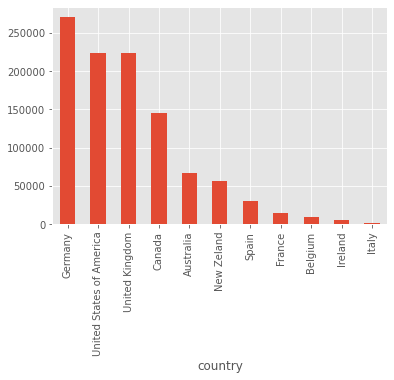

In [124]:
countries_n_transactions.plot(kind='bar')
countries = countries_n_transactions.index

In [137]:
# change the i to print and inspect the itemsets of the vendor i
i = 10
country = df_fp[df_fp['country']==countries[i]]
transactions = country.groupby(['time_code'])['name'].apply(list)

# extract interesting association rules
# Apriori report 'S' = support as percentage
#                'C' = confidence as percentage
baskets = transactions.values
rules = apriori(baskets, supp=40, zmin=2, zmax=4, target='r', conf=80, report='SC') 
rules

[('Kingston',
  ('Kingston Valueram', 'Crucial'),
  37.03703703703704,
  85.1063829787234),
 ('Crucial', ('Kingston Valueram',), 43.51851851851852, 87.03703703703704),
 ('Kingston',
  ('Kingston Hyperx Fury', 'Crucial'),
  37.96296296296296,
  83.6734693877551),
 ('Crucial', ('Kingston Hyperx Fury',), 45.370370370370374, 83.05084745762711),
 ('Crucial',
  ('Crucial Ballistix Sport', 'Kingston'),
  53.70370370370371,
  100.0),
 ('Kingston',
  ('Crucial Ballistix Sport', 'Crucial'),
  53.70370370370371,
  93.54838709677419),
 ('Crucial Ballistix Sport',
  ('Kingston', 'Crucial'),
  53.70370370370371,
  89.23076923076924),
 ('Kingston', ('Crucial Ballistix Sport',), 53.70370370370371, 90.625),
 ('Crucial', ('Crucial Ballistix Sport',), 57.407407407407405, 96.875),
 ('Crucial', ('Kingston',), 60.18518518518518, 87.83783783783784)]

Association rules for Germany, total sale ~270k, supp 100, conf 100:
- ('Crucial', ('Kingston Hyperx Fury', 'Corsair Vengeance'), 100, 100)

Association rules for USA, total sale ~220k, supp 100, conf 100:
- ('Corsair Vengeance', ('Kingston', 'Crucial'), 98.90710382513662, 99.72451790633609)

Association rules for Australia, total sale ~220k 
- ('Corsair Vengeance', ('Crucial', 'Kingston'), 88.27586206896552, 99.68847352024922)

Association rules for France, total sale ~15k 
- ('Corsair Vengeance', ('G.Skill Trident Z', 'Kingston Hyperx Fury'),  35.24096385542169, 84.17266187050359)

Association rules for Italy, total sale ~1.3k
- ('Crucial', ('Kingston',), 60.18518518518518, 87.83783783783784)